In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
%matplotlib inline

In [308]:
#download from wikipedia into text file
webd=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [309]:
# parse data into Beautifulsoap object
from bs4 import BeautifulSoup
soup = BeautifulSoup(webd,'html.parser')
#print(soup.prettify())

In [310]:
# store table data
pstcode = []
brgh = []
nghbrh = []
for tag in soup.find('table').find_all('tr'):
    cells = tag.find_all('td')
    if (len(cells)>0):
        pstcode.append(cells[0].text)
        brgh.append(cells[1].text)
        nghbrh.append(cells[2].text)

pstcode=list(map(lambda x:x.rstrip("\n"),pstcode ))
brgh=list(map(lambda x:x.rstrip("\n"),brgh))
nghbrh=list(map(lambda x:x.rstrip("\n"),nghbrh))

df_tor=pd.DataFrame({"PostalCode":pstcode, "Borough":brgh,"Neighborhood":nghbrh})
df_tor.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [311]:
#remove "Not assigned" Boroughs 
df_toronto=df_tor[df_tor.Borough!='Not assigned']
df_toronto.reset_index(drop=True, inplace=True)
df_toronto.shape

(103, 3)

In [221]:
df_toronto.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [222]:
# check if there are Neighborhoods with the same PostalCode
df_tor2=df_toronto['PostalCode'].unique()
df_tor2.shape
# => all PostalCodes are unique as the shape of both databases 
# (with unigue and not unigue values of PostalCode) is 103

(103,)

In [223]:
# Check if there is "Not assigned" Neighborhoods
df_tor3=df_toronto[df_toronto.Neighborhood=='Not assigned']
df_tor3.head()
# => there is no "Not assigned" Neighborhoods

,PostalCode,Borough,Neighborhood


In [224]:
# how many unique boroghs there 
df_tor4=df_toronto['Borough'].unique()
df_tor4

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [312]:
url="http://cocl.us/Geospatial_data"
geo_data=pd.read_csv(url)

In [313]:
geo_data.columns=('PostalCode', 'Latitude', 'Longitude')
df_torontoll=pd.merge(df_toronto, geo_data, how='inner', on='PostalCode')

In [314]:
df_torontoll.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [14]:
!pip install folium

     |████████████████████████████████| 102kB 8.9MB/s eta 0:00:01


In [315]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [316]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [234]:
#create map of Toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_torontoll['Latitude'], df_torontoll['Longitude'], df_torontoll['Borough'], df_torontoll['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [235]:
CLIENT_ID = 'QRAPJ1HMMMW13H5Z2LGTF11XLQV0RMVE5BQBROQZUPHAA3I1' # your Foursquare ID
CLIENT_SECRET = 'MCAL3UGYT52NVTAYKRBR0FMBV4URGSAY3DLE5ILOFEKNBZND' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QRAPJ1HMMMW13H5Z2LGTF11XLQV0RMVE5BQBROQZUPHAA3I1
CLIENT_SECRET:MCAL3UGYT52NVTAYKRBR0FMBV4URGSAY3DLE5ILOFEKNBZND


In [317]:
import json
from pandas.io.json import json_normalize

In [318]:
#let's explore the 2nd row neighborhood - Victoria Village
neighborhood_latitude = df_torontoll.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_torontoll.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_torontoll.loc[1, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Victoria Village are 43.725882299999995, -79.31557159999998.


In [319]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QRAPJ1HMMMW13H5Z2LGTF11XLQV0RMVE5BQBROQZUPHAA3I1&client_secret=MCAL3UGYT52NVTAYKRBR0FMBV4URGSAY3DLE5ILOFEKNBZND&v=20180605&ll=43.725882299999995,-79.31557159999998&radius=500&limit=100'

In [320]:
results = requests.get(url).json()
#results

In [321]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [322]:
venues = results['response']['groups'][0]['items']
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c633acb86b6be9a61268e34',
   'name': 'Victoria Village Arena',
   'location': {'lat': 43.72348055545508,
    'lng': -79.31563520925143,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.72348055545508,
      'lng': -79.31563520925143}],
    'distance': 267,
    'cc': 'CA',
    'country': 'Canada',
    'formattedAddress': ['Canada']},
   'categories': [{'id': '4bf58dd8d48988d185941735',
     'name': 'Hockey Arena',
     'pluralName': 'Hockey Arenas',
     'shortName': 'Hockey',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_hockey_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4c633acb86b6be9a61268e34-0'},
 {'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general'

In [324]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Victoria Village Arena,Hockey Arena,43.723481,-79.315635
1,Portugril,Portuguese Restaurant,43.725819,-79.312785
2,Tim Hortons,Coffee Shop,43.725517,-79.313103
3,The Frig,French Restaurant,43.727051,-79.317418
4,Eglinton Ave E & Sloane Ave/Bermondsey Rd,Intersection,43.726086,-79.313620


In [325]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [326]:
#let's explore all neighborhoods 


#fuction to repeat the same process as with St.James Town to all neighborhoods 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [327]:
borough_Toronto_venues = getNearbyVenues(names=df_torontoll['Neighborhood'],
                                   latitudes=df_torontoll['Latitude'],
                                   longitudes=df_torontoll['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [328]:
print(borough_Toronto_venues.shape) #the size of the resulting dataframe
borough_Toronto_venues.head()

(2141, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [243]:
# let's check how many venues were returned for each neighborhood
borough_Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16


In [244]:
# let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(borough_Toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


In [245]:
#analyse each neighborhood in boroughs 

# one hot encoding
borough_Toronto_onehot = pd.get_dummies(borough_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
borough_Toronto_onehot['Neighborhood'] = borough_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [borough_Toronto_onehot.columns[-1]] + list(borough_Toronto_onehot.columns[:-1])
borough_Toronto_onehot = borough_Toronto_onehot[fixed_columns]

borough_Toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
# let's see all category names to define where other wellness practices possible besides Yoga Studios
list(borough_Toronto_onehot)
# we got "Gym" and 'Gym / Fitness Center'

['Yoga Studio',
 'Accessories Store',
 'Afghan Restaurant',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Business Service',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Candy Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Ch

In [247]:
df_wellness = borough_Toronto_onehot[['Neighborhood', "Yoga Studio", "Gym", 'Gym / Fitness Center']]
df_wellness.head()

,Neighborhood,Yoga Studio,Gym,Gym / Fitness Center
0,Parkwoods,0,0,0
1,Parkwoods,0,0,0
2,Parkwoods,0,0,0
3,Victoria Village,0,0,0
4,Victoria Village,0,0,0


In [248]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of Yoga Studio, Gym or Gym/Fitness category

borough_wellness_grouped = df_wellness.groupby('Neighborhood').mean().reset_index()
borough_wellness_grouped.head()

,Neighborhood,Yoga Studio,Gym,Gym / Fitness Center
0,Agincourt,0.0,0.000000,0.0
1,"Alderwood, Long Branch",0.0,0.142857,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.0
3,Bayview Village,0.0,0.000000,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.0


In [249]:
borough_wellness_grouped.shape

(96, 4)

In [250]:
# let's define neighborhoods wheich have any wellness studios or gym 
df_yogagym = borough_wellness_grouped[(borough_wellness_grouped["Yoga Studio"]+borough_wellness_grouped["Gym"]+ borough_wellness_grouped["Gym / Fitness Center"])>0]
df_yogagym.head(10)

,Neighborhood,Yoga Studio,Gym,Gym / Fitness Center
1,"Alderwood, Long Branch",0.000000,0.142857,0.000000
5,Berczy Park,0.000000,0.017241,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.045455,0.000000
11,Canada Post Gateway Processing Centre,0.000000,0.076923,0.000000
13,Central Bay Street,0.015625,0.000000,0.015625
15,Church and Wellesley,0.026667,0.013333,0.000000
18,"Commerce Court, Victoria Hotel",0.000000,0.040000,0.010000
19,Davisville,0.000000,0.057143,0.000000
20,Davisville North,0.000000,0.100000,0.100000
22,Don Mills,0.000000,0.111111,0.000000


In [113]:
df_yogagym.shape
#37 from 96 have Yoga Studios or Gym, so other neighborhoods can be reviewed for out yoga studios chain 

(37, 4)

In [288]:
borough_wellness_grouped2 = df_wellness.groupby('Neighborhood').sum().reset_index()
borough_wellness_grouped2=borough_wellness_grouped2[borough_wellness_grouped2['Total']>0]

In [289]:
borough_wellness_grouped2.drop("Total", axis=1,inplace= True)
borough_wellness_grouped2.set_index('Neighborhood', inplace=True)
borough_wellness_grouped2.head()

,Yoga Studio,Gym,Gym / Fitness Center
Neighborhood,,,
"Alderwood, Long Branch",0,1,0
Berczy Park,0,1,0
"Brockton, Parkdale Village, Exhibition Place",0,1,0
Canada Post Gateway Processing Centre,0,1,0
Central Bay Street,1,0,1


In [286]:
borough_wellness_grouped2.shape

(37, 4)

In [291]:
borough_wellness_grouped3=borough_wellness_grouped2.transpose()

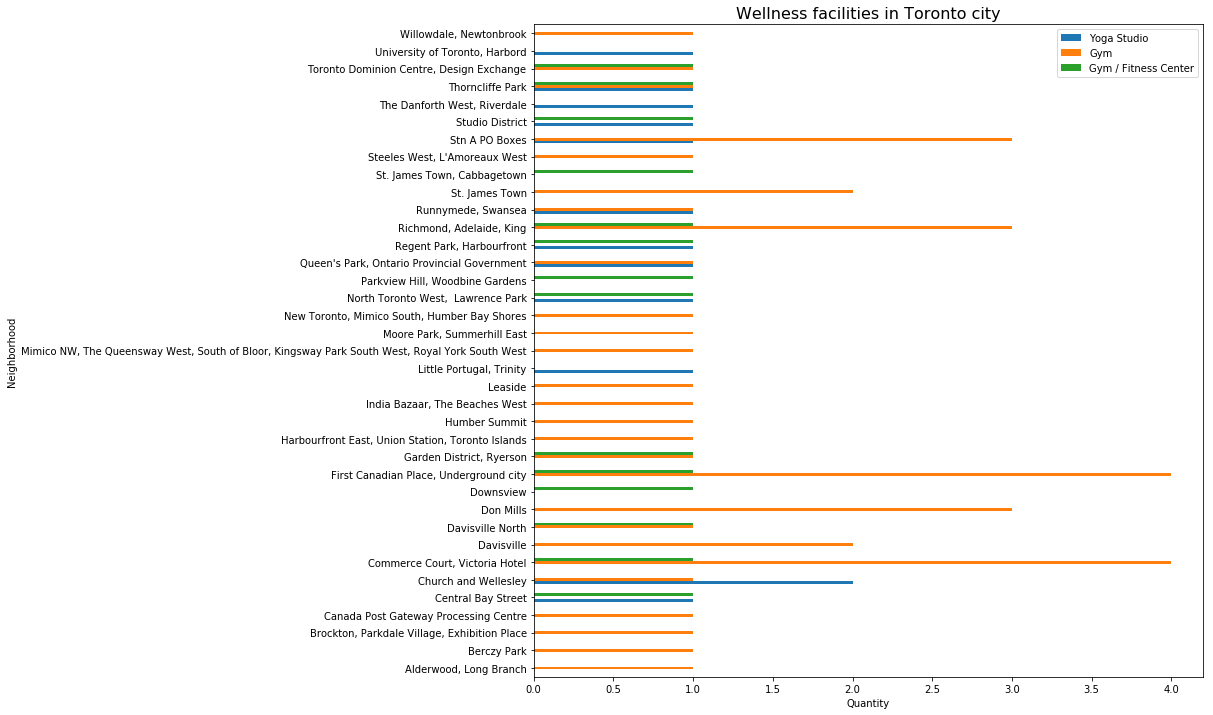

In [301]:
borough_wellness_grouped2.plot(kind="barh",figsize=(12,12))
plt.xlabel("Quantity")
plt.title('Wellness facilities in Toronto city', fontsize=16)
plt.show()

In [304]:
# let's create a list with neighborhoods without Yoga Studio, Gym or Gym/Fitness, where possible to open Yoga Studios
borough_wellness_grouped3 = df_wellness.groupby('Neighborhood').sum().reset_index()
borough_wellness_grouped3=borough_wellness_grouped3[borough_wellness_grouped3['Total']==0]

In [305]:
borough_wellness_grouped3.drop("Total", axis=1,inplace= True)
borough_wellness_grouped3.set_index('Neighborhood', inplace=True)
borough_wellness_grouped3

,Yoga Studio,Gym,Gym / Fitness Center
Neighborhood,,,
Agincourt,0,0,0
"Bathurst Manor, Wilson Heights, Downsview North",0,0,0
Bayview Village,0,0,0
"Bedford Park, Lawrence Manor East",0,0,0
"Birch Cliff, Cliffside West",0,0,0
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0,0,0
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0,0,0
Caledonia-Fairbanks,0,0,0
Cedarbrae,0,0,0


In [306]:
borough_wellness_grouped3.shape

(59, 3)

In [146]:
borough_Toronto_grouped = borough_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
borough_Toronto_grouped

CategName,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Alderwood, Long Branch",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Bayview Village,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Berczy Park,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.017241,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,"Business reply mail Processing Centre, South C...",0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000,0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,...,0.00000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [147]:
borough_Toronto_grouped.shape

(96, 269)

In [148]:
# let's print each neighborhood with the top 5 most common venues to know if wellness practices are popular there
num_top_venues = 5

for hood in borough_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = borough_Toronto_grouped[borough_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot  0.25
1                     Lounge  0.25
2               Skating Rink  0.25
3  Latin American Restaurant  0.25
4              Metro Station  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1  Sandwich Place  0.14
2        Pharmacy  0.14
3     Coffee Shop  0.14
4             Pub  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0         Bank  0.10
1  Coffee Shop  0.10
2  Pizza Place  0.05
3  Gas Station  0.05
4  Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4        Movie Theater  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0          Restaurant  0.09
1      Sandwich Place  0.09
2  Italian Restaurant  0.09
3         Coffee Shop  0.09
4             Butcher  0.04

               venue  freq
0  Convenience Store   0.2
1        Coffee Shop   0.2
2     Discount Store   0.2
3         Hobby Shop   0.2
4   Department Store   0.2


----Kensington Market, Chinatown, Grange Park----
                           venue  freq
0                           Café  0.08
1                    Coffee Shop  0.06
2  Vegetarian / Vegan Restaurant  0.06
3             Mexican Restaurant  0.05
4                   Dessert Shop  0.05


----Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens----
                       venue  freq
0                Pizza Place  0.25
1                   Bus Line  0.25
2             Sandwich Place  0.25
3          Mobile Phone Shop  0.25
4  Middle Eastern Restaurant  0.00


----Lawrence Manor, Lawrence Heights----
                    venue  freq
0          Clothing Store  0.27
1  Furniture / Home Store  0.18
2   Vietnamese Restaurant  0.09
3      Miscellaneous Shop  0.09
4             Coffee Shop  0.09


----Lawrence Park----
 

            venue  freq
0            Café  0.14
1  Sandwich Place  0.14
2     Coffee Shop  0.09
3    Liquor Store  0.05
4    Burger Joint  0.05


----The Beaches----
               venue  freq
0              Trail   0.2
1   Asian Restaurant   0.2
2  Health Food Store   0.2
3                Pub   0.2
4        Yoga Studio   0.0


----The Danforth West, Riverdale----
                    venue  freq
0        Greek Restaurant  0.19
1      Italian Restaurant  0.07
2             Coffee Shop  0.07
3  Furniture / Home Store  0.05
4              Restaurant  0.05


----The Kingsway, Montgomery Road, Old Mill North----
                 venue  freq
0                River   1.0
1  Moroccan Restaurant   0.0
2               Market   0.0
3    Martial Arts Dojo   0.0
4       Massage Studio   0.0


----Thorncliffe Park----
               venue  freq
0  Indian Restaurant  0.09
1        Yoga Studio  0.04
2       Intersection  0.04
3        Coffee Shop  0.04
4     Discount Store  0.04


----Toronto Dominion

In [149]:
# let's put that into a pandas dataframe

# a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [200]:
# let's create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = borough_Toronto_grouped['Neighborhood']

for ind in np.arange(borough_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(borough_Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Pharmacy,Pub,Sandwich Place,Dessert Shop,Curling Ice,Dance Studio,Deli / Bodega
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Grocery Store,Fried Chicken Joint,Diner,Sandwich Place,Bridal Shop,Deli / Bodega,Restaurant,Ice Cream Shop
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Grocery Store,Thai Restaurant,Juice Bar,Fast Food Restaurant,Indian Restaurant,Pub


In [201]:
# Cluster Neighborhoods
# Run k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5

borough_Toronto_grouped_clustering = borough_Toronto_grouped.drop('Neighborhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(borough_Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 2, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 2], dtype=int32)

In [202]:
# let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels

neighborhoods_venues_sorted.insert(0,"Cluster Labels",kmeans.labels_)

In [203]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
1,0,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Pharmacy,Pub,Sandwich Place,Dessert Shop,Curling Ice,Dance Studio,Deli / Bodega
2,0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Grocery Store,Fried Chicken Joint,Diner,Sandwich Place,Bridal Shop,Deli / Bodega,Restaurant,Ice Cream Shop
3,0,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
4,0,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Grocery Store,Thai Restaurant,Juice Bar,Fast Food Restaurant,Indian Restaurant,Pub
5,0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Farmers Market,Café,Beer Bar,Cheese Shop,Bakery,Restaurant,Hotel
6,0,"Birch Cliff, Cliffside West",Skating Rink,College Stadium,Café,General Entertainment,Women's Store,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
7,0,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,Bakery
8,0,"Business reply mail Processing Centre, South C...",Light Rail Station,Comic Shop,Pizza Place,Fast Food Restaurant,Auto Workshop,Farmers Market,Spa,Brewery,Burrito Place,Restaurant
9,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Boutique,Boat or Ferry,Rental Car Location,Bar,Plane


In [204]:
borough_Toronto_merged = df_torontoll.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
borough_Toronto_merged = borough_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

borough_Toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,2.0,Construction & Landscaping,Park,Food & Drink Shop,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,French Restaurant,Pizza Place,Intersection,Hockey Arena,Portuguese Restaurant,Coffee Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Pub,Bakery,Theater,Breakfast Spot,Café,Health Food Store,Beer Store,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Furniture / Home Store,Accessories Store,Miscellaneous Shop,Vietnamese Restaurant,Event Space,Coffee Shop,Boutique,Women's Store,Diner
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Diner,College Cafeteria,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4.0,Fast Food Restaurant,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
7,M3B,North York,Don Mills,43.745906,-79.352188,0.0,Gym,Beer Store,Restaurant,Japanese Restaurant,Coffee Shop,Grocery Store,Athletics & Sports,Bike Shop,Italian Restaurant,Discount Store
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.0,Pizza Place,Fast Food Restaurant,Bank,Pharmacy,Gym / Fitness Center,Intersection,Athletics & Sports,Gastropub,Diner,Department Store
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Hotel,Bubble Tea Shop,Cosmetics Shop,Italian Restaurant,Middle Eastern Restaurant,Ramen Restaurant


In [205]:
borough_Toronto_merged.dropna(inplace=True)
borough_Toronto_merged.reset_index(drop=True, inplace=True)

In [206]:
borough_Toronto_merged['Cluster Labels']=borough_Toronto_merged['Cluster Labels'].astype('int')

In [207]:
borough_Toronto_merged.shape

(100, 16)

In [208]:
# let's visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_Toronto_merged['Latitude'], borough_Toronto_merged['Longitude'], borough_Toronto_merged['Neighborhood'], borough_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [209]:
#CLUSTER 1

borough_Toronto_merged.loc[borough_Toronto_merged['Cluster Labels'] == 0, borough_Toronto_merged.columns[[1] + list(range(5, borough_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,0,French Restaurant,Pizza Place,Intersection,Hockey Arena,Portuguese Restaurant,Coffee Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
2,Downtown Toronto,0,Coffee Shop,Park,Pub,Bakery,Theater,Breakfast Spot,Café,Health Food Store,Beer Store,Shoe Store
3,North York,0,Clothing Store,Furniture / Home Store,Accessories Store,Miscellaneous Shop,Vietnamese Restaurant,Event Space,Coffee Shop,Boutique,Women's Store,Diner
4,Downtown Toronto,0,Coffee Shop,Diner,College Cafeteria,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
6,North York,0,Gym,Beer Store,Restaurant,Japanese Restaurant,Coffee Shop,Grocery Store,Athletics & Sports,Bike Shop,Italian Restaurant,Discount Store
7,East York,0,Pizza Place,Fast Food Restaurant,Bank,Pharmacy,Gym / Fitness Center,Intersection,Athletics & Sports,Gastropub,Diner,Department Store
8,Downtown Toronto,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Hotel,Bubble Tea Shop,Cosmetics Shop,Italian Restaurant,Middle Eastern Restaurant,Ramen Restaurant
9,North York,0,Park,Italian Restaurant,Bakery,Pub,Japanese Restaurant,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Dance Studio
10,Etobicoke,0,Filipino Restaurant,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
11,Scarborough,0,Bar,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Event Space


In [210]:
#CLUSTER 2

borough_Toronto_merged.loc[borough_Toronto_merged['Cluster Labels'] == 1, borough_Toronto_merged.columns[[1] + list(range(5, borough_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,North York,1,Gym,Pizza Place,Women's Store,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
50,North York,1,Gym,Curling Ice,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
81,Central Toronto,1,Gym,Tennis Court,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center


In [211]:
#CLUSTER 3

borough_Toronto_merged.loc[borough_Toronto_merged['Cluster Labels'] == 2, borough_Toronto_merged.columns[[1] + list(range(5, borough_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,2,Construction & Landscaping,Park,Food & Drink Shop,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
20,York,2,Park,Women's Store,Pool,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
34,East York,2,Park,Metro Station,Convenience Store,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
47,North York,2,Construction & Landscaping,Park,Bakery,Basketball Court,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
62,York,2,Park,Convenience Store,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
64,North York,2,Park,Flower Shop,Convenience Store,Women's Store,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
83,Scarborough,2,Park,Playground,Women's Store,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
89,Downtown Toronto,2,Park,Playground,Trail,Donut Shop,Doner Restaurant,Drugstore,Dog Run,Distribution Center,Discount Store,Cuban Restaurant


In [212]:
#CLUSTER 4

borough_Toronto_merged.loc[borough_Toronto_merged['Cluster Labels'] == 3, borough_Toronto_merged.columns[[1] + list(range(5, borough_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,North York,3,Baseball Field,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store,Event Space
98,Etobicoke,3,Baseball Field,Deli / Bodega,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Event Space,Dog Run


In [213]:
#CLUSTER 5

borough_Toronto_merged.loc[borough_Toronto_merged['Cluster Labels'] == 4, borough_Toronto_merged.columns[[1] + list(range(5, borough_Toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,4,Fast Food Restaurant,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
